Import

In [1]:
from stroke import *

# Analyse dataset

## Lecture Dataset

In [2]:
# Lecture du fichier CSV
df = pd.read_csv("../healthcare-dataset-stroke-data.csv")

## head

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## shape

In [4]:
# Prise en compte des dimensions du dataframe
df.shape

print(f"Le dataframe contient {df.shape[0]} lignes et {df.shape[1]} colonnes")

Le dataframe contient 5110 lignes et 12 colonnes


## info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

## describe

In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


## % valeurs abberantes et manquantes

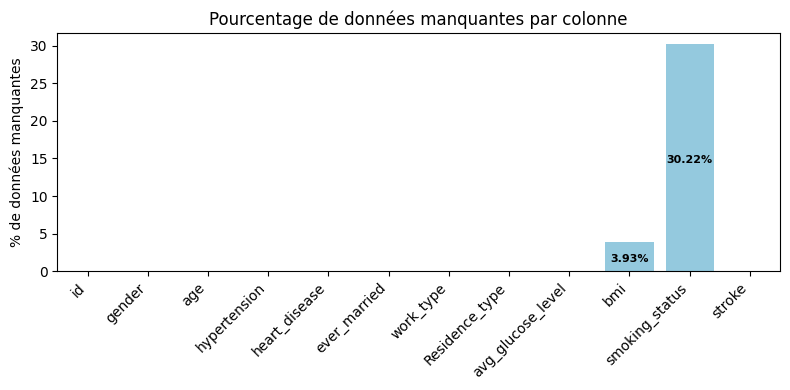

In [9]:
# Calculer le pourcentage de données manquantes par colonne
pourcentage_manquant_par_colonne = df.copy()
pourcentage_manquant_par_colonne["smoking_status"] = pourcentage_manquant_par_colonne["smoking_status"].replace("Unknown", np.nan)
pourcentage_manquant_par_colonne = pourcentage_manquant_par_colonne.isnull().sum() / len(df) * 100

# Créer le graphique à barres
plt.figure(figsize=(8, 4))
sns.barplot(pourcentage_manquant_par_colonne, color='skyblue')
plt.title('Pourcentage de données manquantes par colonne')
plt.ylabel("% de données manquantes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()



# Ajouter les valeurs non nulles au-dessus de chaque barre
for i, v in enumerate(pourcentage_manquant_par_colonne.values):
    if v != 0:  # Vérifier si la valeur est non nulle
        plt.text(i, (v / 2) - 1, f"{round(v, 2)}%", ha='center', va='bottom', fontsize=8, fontweight='bold')
        

plt.show()

Pas d'aberration au vu du describe

## Analyse univariée (a faire pour chaque variable)

### Variables quantitatives

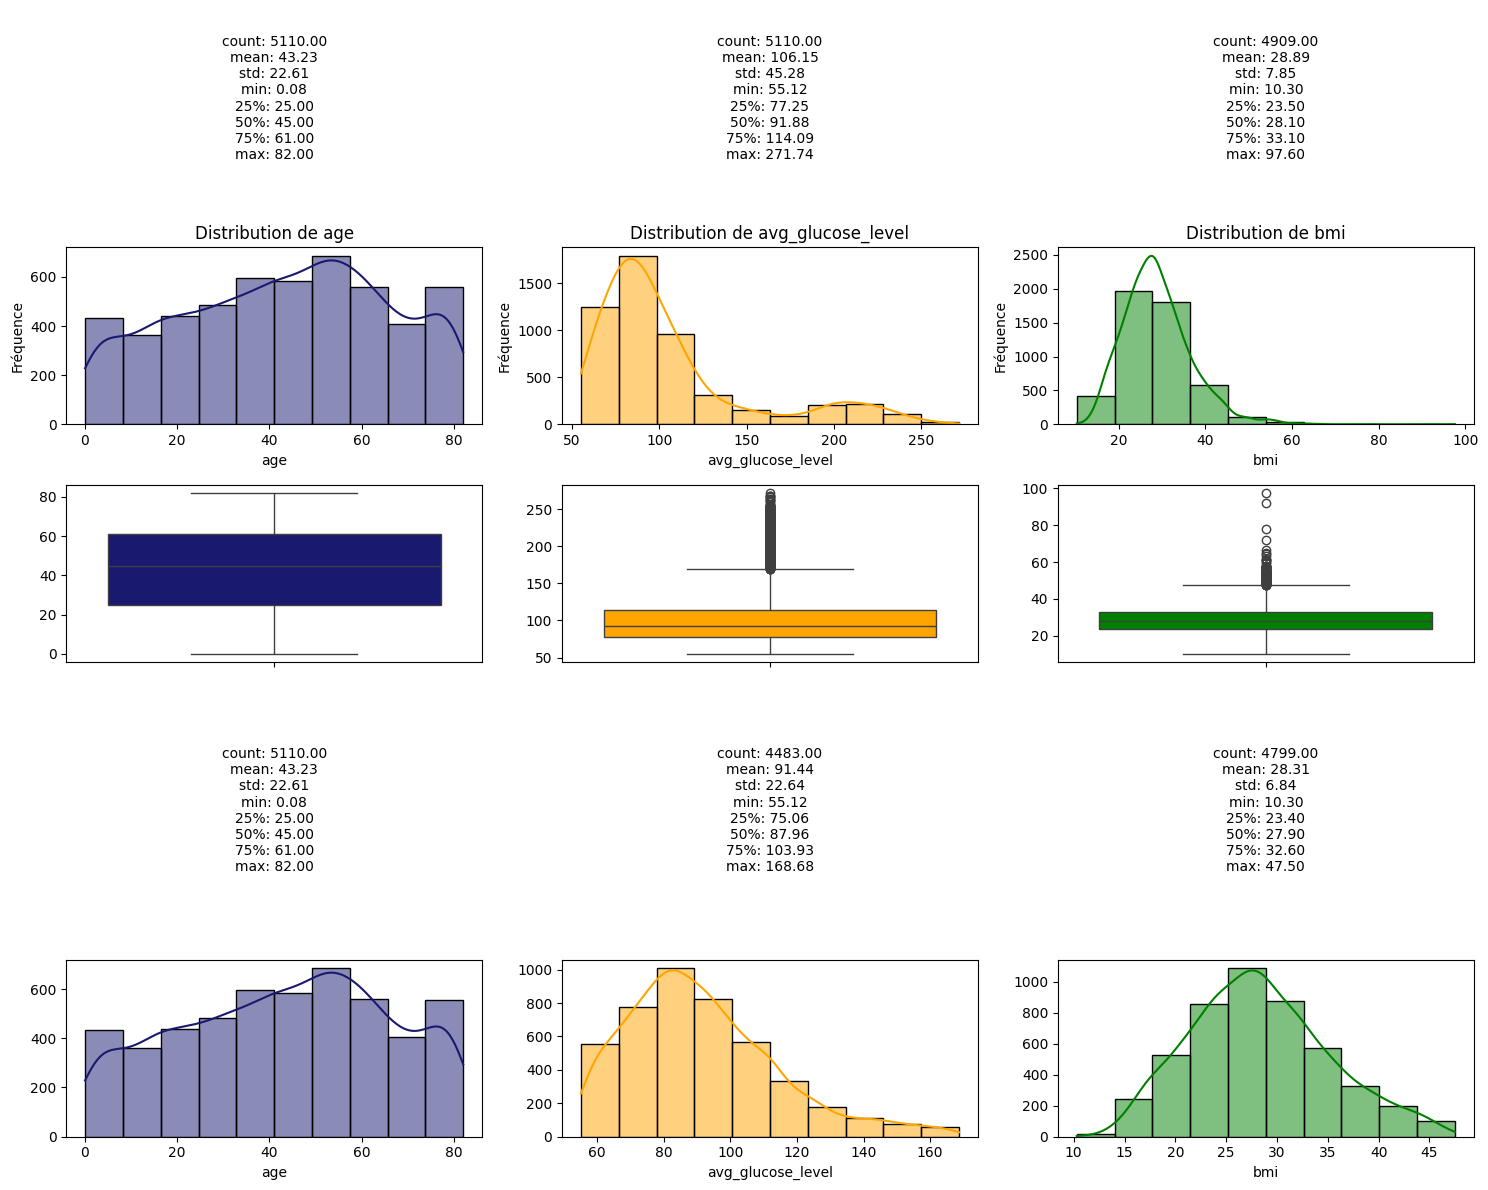

In [10]:
# Création de la figure et des axes
fig, axes = plt.subplots(5, len(variables_quantitatives), figsize=(15, 12))

# Boucle pour générer les graphiques pour chaque variable
for i, (variable, color) in enumerate(zip(variables_quantitatives, colors_quantitative)):
    
    # Statistiques descriptives
    stats = df[variable].describe()
    stats_text = "\n".join([f"{stat}: {value:.2f}" for stat, value in stats.items()])

    # Ajout des statistiques descriptives au-dessus du leur graphique
    axes[0, i].text(0.5, 0.5, stats_text, fontsize=10, ha='center', va='center', transform=axes[0, i].transAxes)
    axes[0, i].axis('off')

    # Histogramme des données brutes
    sns.histplot(df[variable], bins=10, color=color, kde=True, ax=axes[1, i])
    axes[1, i].set_title(f'Distribution de {variable}')
    axes[1, i].set_ylabel('Fréquence')

    # Boîte à moustaches
    sns.boxplot(df[variable], patch_artist=True, boxprops=dict(facecolor=color), ax=axes[2, i])
    axes[2, i].set_xlabel('')
    axes[2, i].set_ylabel('')

    # Histogramme des données filtrées (sans valeurs aberrantes)
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = df[(df[variable] >= lower_bound) & (df[variable] <= upper_bound)]
    
    
    # Statistiques descriptives
    stats_filtred = filtered_data[variable].describe()
    stats_text_filtred = "\n".join([f"{stat}: {value:.2f}" for stat, value in stats_filtred.items()])

    # Ajout des statistiques descriptives au-dessus du leur graphique
    axes[3, i].text(0.5, 0.5, stats_text_filtred, fontsize=10, ha='center', va='center', transform=axes[3, i].transAxes)
    axes[3, i].axis('off')
    
    
    sns.histplot(filtered_data[variable], bins=10, color=color, kde=True, ax=axes[4, i])
    axes[4, i].set_xlabel(variable)
    axes[4, i].set_ylabel('')

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

### Variable qualitative

In [11]:
# Renommage des variables
df["gender"] = df["gender"].replace({
    "Male" : "Homme", 
    "Female" : "Femme", 
    "Other" : "Autre"
    })

df["hypertension"] = df["hypertension"].replace({
    1 : "Yes", 
    0 : "No"
    })

df["heart_disease"] = df["heart_disease"].replace({
    1 : "Yes", 
    0 : "No"
    })

df["work_type"] = df["work_type"].replace({
    'Private' : "Secteur privé", 
    'Self-employed' : "Auto-entrepreneur", 
    'Govt_job' : "Fonctionnaire", 
    'children' : "Enfant", 
    'Never_worked' : "Sans emploi"
    })

df["Residence_type"] = df["Residence_type"].replace({
    'Urban' : "Ville", 
    'Rural' : "Campagne"
    })

df["smoking_status"] = df["smoking_status"].replace({
    'formerly smoked' : "Ancien fumeur", 
    'never smoked' : "Non fumeur", 
    'smokes' : "Fumeur", 
    'Unknown' : "Non connu"
    })

df["stroke"] = df["stroke"].replace({
    1 : "Yes", 
    0 : "No"
    })

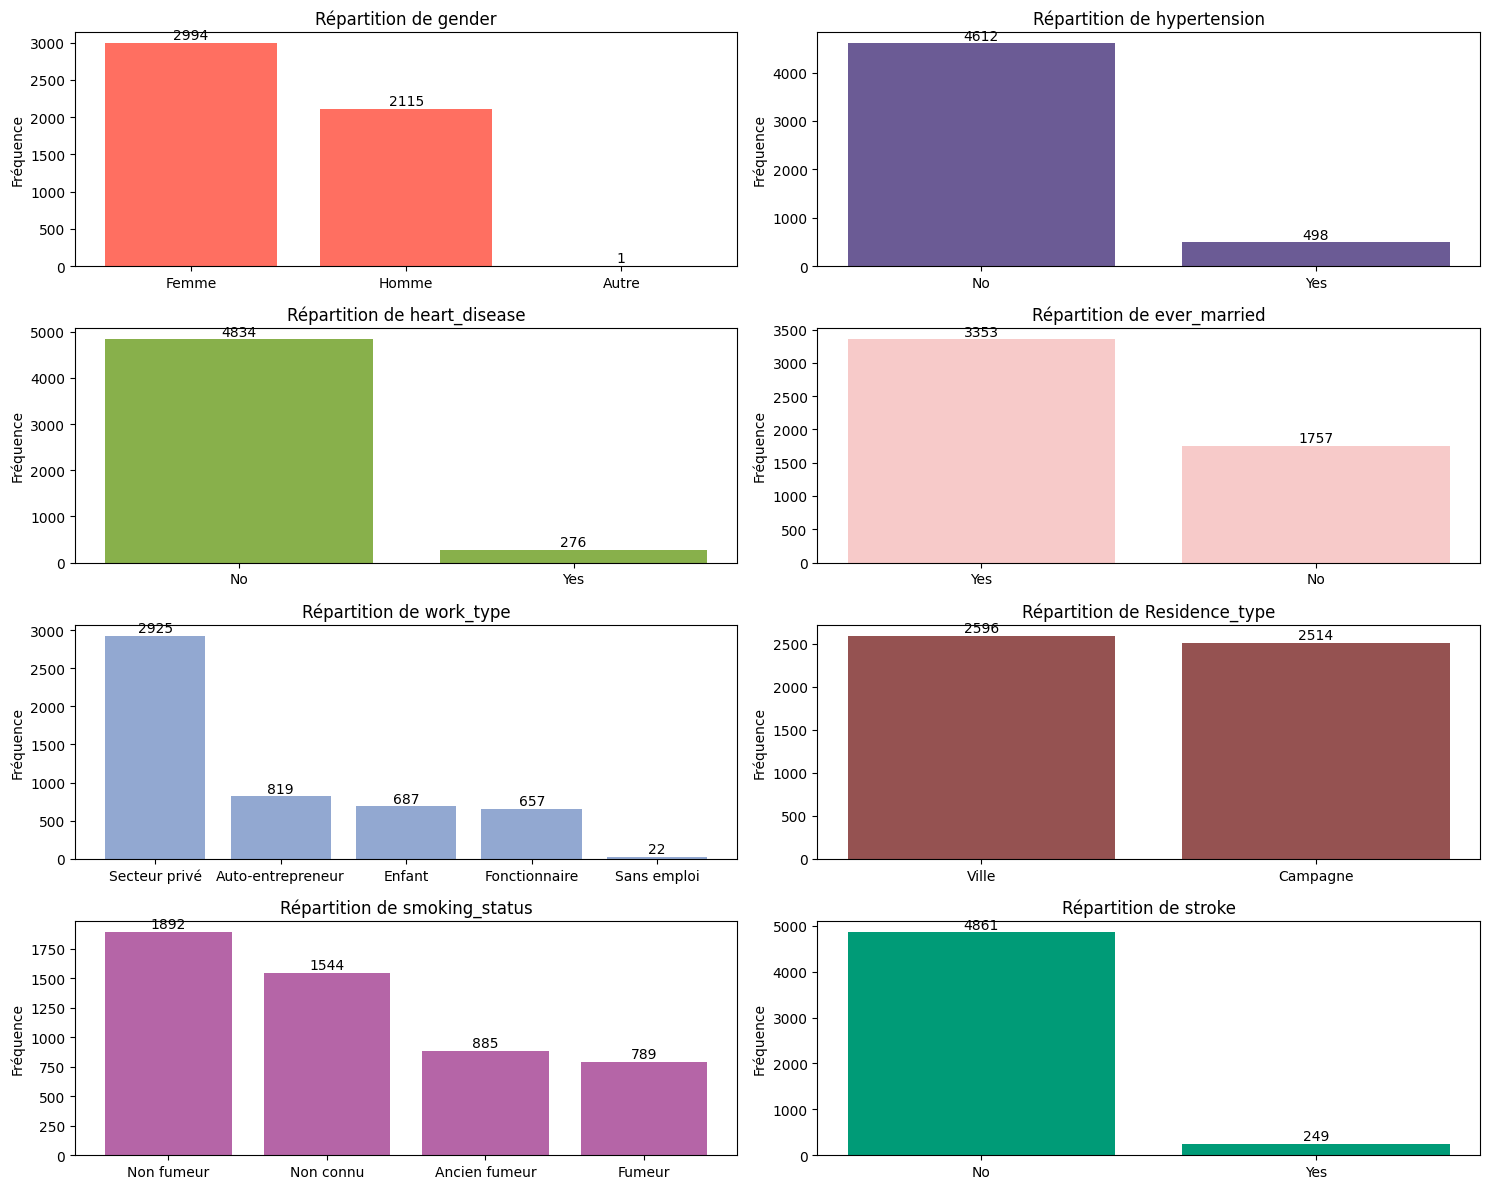

In [12]:
# Calcul du nombre de graphiques sur chaque rangée
num_total_variables = len(variables_qualitatives)
num_graphs_last_row = num_total_variables % 2  # Nombre de graphiques sur la dernière ligne
num_rows = (num_total_variables - num_graphs_last_row) // 2 + num_graphs_last_row
num_cols = 2 if num_graphs_last_row == 0 else num_graphs_last_row

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

# Boucle pour générer les graphiques pour chaque variable qualitative + diagrammes en barres
for i, (variable, color) in enumerate(zip(variables_qualitatives, colors_qualitative)):
    # Compter les occurrences de chaque catégorie
    counts = df[variable].value_counts()

    # Identifier les sous-graphiques
    row = i // 2  # Calcul de la ligne
    col = i % 2   # Calcul de la colonne

    # Diagramme en barres
    ax = axes[row, col]
    ax.bar(counts.index, counts.values, color=color)
    ax.set_title(f'Répartition de {variable}')
    ax.set_ylabel('Fréquence')

    # Ajout des valeurs au-dessus des barres
    for j, count in enumerate(counts.values):
        ax.text(j, count + 10, str(count), ha='center', va='bottom')

# Ajuster l'espacement entre les sous-graphiques
plt.subplots_adjust(hspace=0.7, wspace=0.5)

plt.tight_layout()
plt.show()

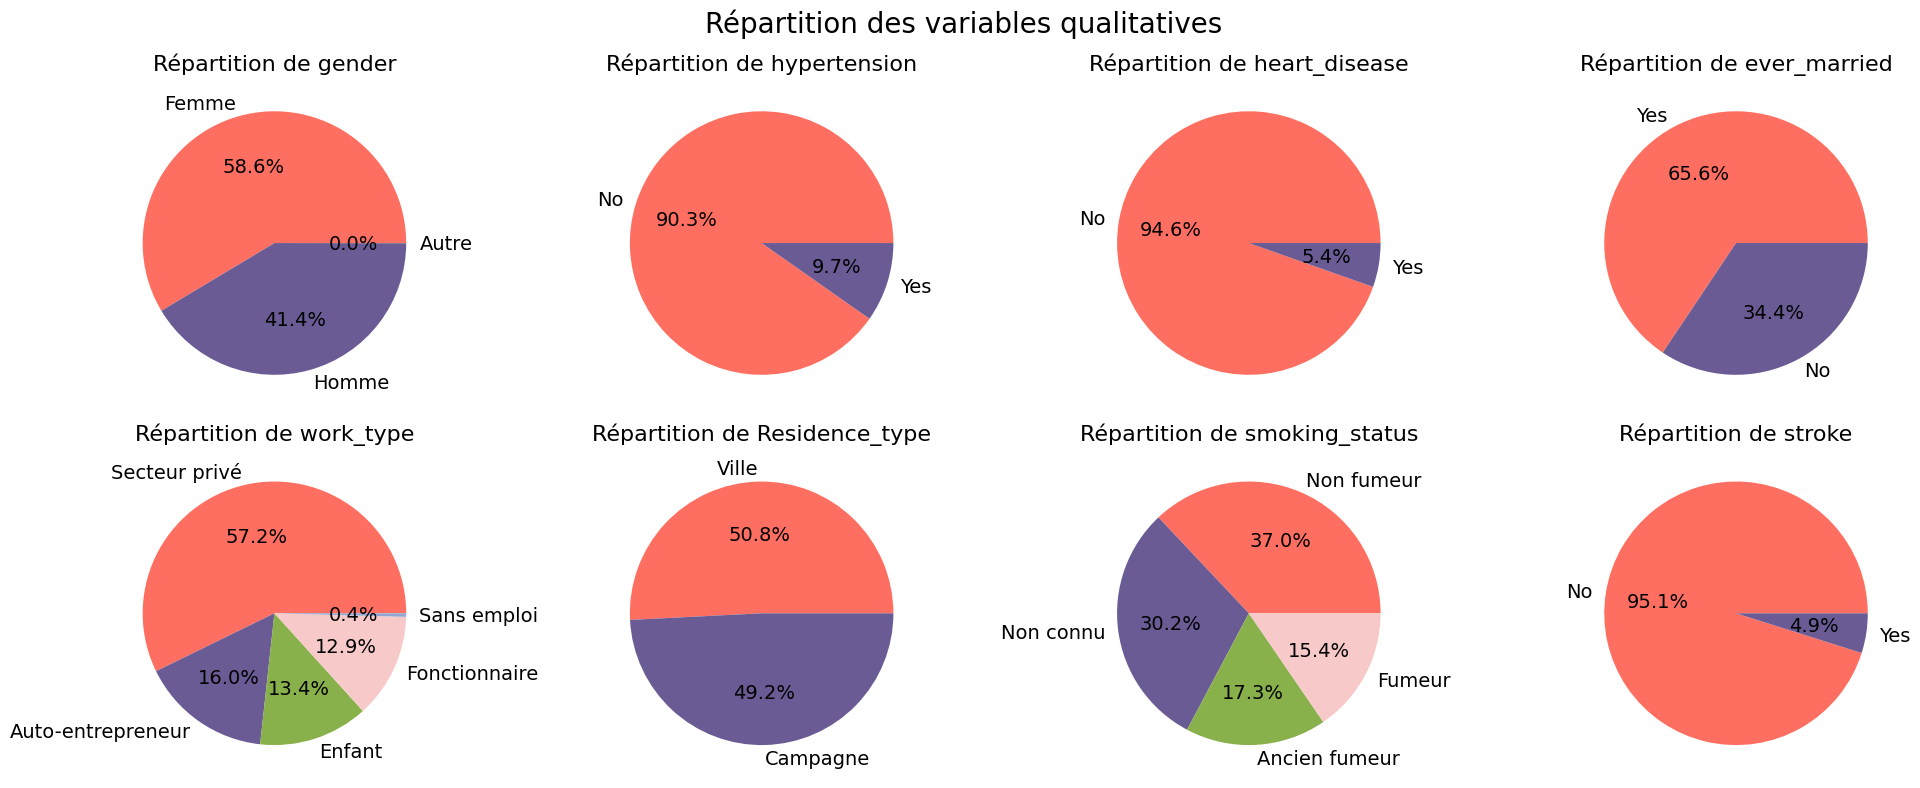

In [13]:
# Calcul du nombre de graphiques sur chaque rangée
num_total_variables = len(variables_qualitatives)
num_graphs_per_row = 4  # Quatre graphiques par ligne
num_rows = (num_total_variables + num_graphs_per_row - 1) // num_graphs_per_row

# Définir la taille de la figure
figsize_width = 20  # Largeur de la figure
figsize_height = num_rows * 4  # Hauteur de la figure, ajustée en fonction du nombre de lignes

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(num_rows, num_graphs_per_row, figsize=(figsize_width, figsize_height))

# Boucle pour générer les graphiques pour chaque variable qualitative + diagrammes en camembert
for i, (variable, color) in enumerate(zip(variables_qualitatives, colors_qualitative)):
    # Comptage des occurrences de chaque catégorie
    counts = df[variable].value_counts()
    row = i // num_graphs_per_row
    col = i % num_graphs_per_row

    # Diagramme en camembert
    ax = axes[row, col]
    ax.pie(counts, labels=counts.index, colors=colors_qualitative[:len(counts)], autopct='%1.1f%%', textprops={'fontsize': 14})
    ax.set_title(f'Répartition de {variable}', fontsize=16)
    ax.set_ylabel('', fontsize=14)

# Agrandir la police du titre de la figure
plt.suptitle('Répartition des variables qualitatives', fontsize=20)
plt.tight_layout()
plt.show()

## Analyse bi-variée (a faire pour chaque variable)

### Variable "stroke" + "gender"

#### correlation chi2

gender  Autre  Femme  Homme
stroke                     
No          1   2853   2007
Yes         0    141    108
Chi2: 0.47258662884530234
p-value: 0.7895490538408245


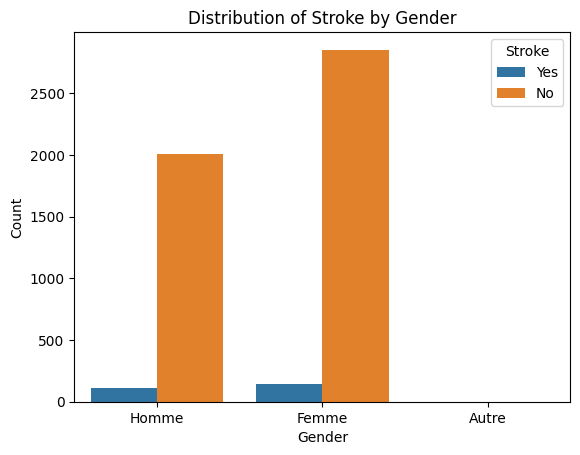

Il n'y a pas de corrélation entre le genre et le fait d'avoir eu un AVC.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

width = 0.35  # Largeur des barres

# Calcul du tableau de contingence
contingency_table = pd.crosstab(df['stroke'], df['gender'])

# Affichage du tableau de contingence
print(contingency_table)

# Test du chi-deux pour l'indépendance
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi2:", chi2)
print("p-value:", p)

# Création d'un diagramme en barres pour visualiser les résultats
ax = sns.countplot(data=df, x='gender', hue='stroke')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Stroke by Gender')
plt.legend(title='Stroke', loc='upper right')

'''    # Ajout des valeurs au-dessus des barres
for j, count in enumerate(counts.values):
    ax.text(j, count + 10, str(count), ha='center', va='bottom')'''

plt.show()

# Comparaison avec un seuil de signification (par exemple 0.05)
alpha = 0.05
if p < alpha:
    print("Il y a une corrélation entre le genre et le fait d'avoir eu un AVC.")
else:
    print("Il n'y a pas de corrélation entre le genre et le fait d'avoir eu un AVC.")

### Variable "stroke" + "heart_disease"

#### correlation chi2

In [15]:
# Calcul du tableau de contingence
contingency_table = pd.crosstab(df['heart_disease'], df['stroke'])

# Affichage du tableau de contingence
print(contingency_table)

# Test du chi-deux pour l'indépendance
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi2:", chi2)
print("p-value:", p)

if p < alpha:
    print("Il y a une corrélation entre les maladies cardiaques et le fait d'avoir eu un AVC.")
else:
    print("Il n'y a pas de corrélation entre les maladies cardiaques et le fait d'avoir eu un AVC.")

stroke           No  Yes
heart_disease           
No             4632  202
Yes             229   47
Chi2: 90.25956125843324
p-value: 2.0887845685229236e-21
Il y a une corrélation entre les maladies cardiaques et le fait d'avoir eu un AVC.


### Variable "stroke" + "ever_married"

#### correlation chi2

In [16]:
# Calcul du tableau de contingence
contingency_table = pd.crosstab(df['ever_married'], df['stroke'])

# Affichage du tableau de contingence
print(contingency_table)

# Test du chi-deux pour l'indépendance
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi2:", chi2)
print("p-value:", p)

if p < alpha:
    print("Il y a une corrélation entre les maladies cardiaques et le fait d'avoir eu un AVC.")
else:
    print("Il n'y a pas de corrélation entre les maladies cardiaques et le fait d'avoir eu un AVC.")

stroke          No  Yes
ever_married           
No            1728   29
Yes           3133  220
Chi2: 58.923890259034195
p-value: 1.6389021142314745e-14
Il y a une corrélation entre les maladies cardiaques et le fait d'avoir eu un AVC.


### Variable "stroke" + "work_type"

#### correlation chi2

In [17]:
# Calcul du tableau de contingence
contingency_table = pd.crosstab(df['work_type'], df['stroke'])

# Affichage du tableau de contingence
print(contingency_table)

# Test du chi-deux pour l'indépendance
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi2:", chi2)
print("p-value:", p)

if p < alpha:
    print("Il y a une corrélation entre le type de travail et le fait d'avoir eu un AVC.")
else:
    print("Il n'y a pas de corrélation entre le type de travail et le fait d'avoir eu un AVC.")

stroke               No  Yes
work_type                   
Auto-entrepreneur   754   65
Enfant              685    2
Fonctionnaire       624   33
Sans emploi          22    0
Secteur privé      2776  149
Chi2: 49.16351197667529
p-value: 5.397707801896138e-10
Il y a une corrélation entre le type de travail et le fait d'avoir eu un AVC.


### Variable "stroke" + "Residence_type"

#### correlation chi2

In [18]:
# Calcul du tableau de contingence
contingency_table = pd.crosstab(df['Residence_type'], df['stroke'])

# Affichage du tableau de contingence
print(contingency_table)

# Test du chi-deux pour l'indépendance
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi2:", chi2)
print("p-value:", p)

if p < alpha:
    print("Il y a une corrélation entre le lieu d'habitation et le fait d'avoir eu un AVC.")
else:
    print("Il n'y a pas de corrélation entre le lieu d'habitation et le fait d'avoir eu un AVC.")

stroke            No  Yes
Residence_type           
Campagne        2400  114
Ville           2461  135
Chi2: 1.0816367471627524
p-value: 0.29833169286876987
Il n'y a pas de corrélation entre le lieu d'habitation et le fait d'avoir eu un AVC.


### Variable "stroke" + "smoking_status"

#### correlation chi2

In [19]:
# Calcul du tableau de contingence
contingency_table = pd.crosstab(df['smoking_status'], df['stroke'])

# Affichage du tableau de contingence
print(contingency_table)

# Test du chi-deux pour l'indépendance
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi2:", chi2)
print("p-value:", p)

if p < alpha:
    print("Il y a une corrélation entre le fait de fumer et le fait d'avoir eu un AVC.")
else:
    print("Il n'y a pas de corrélation entre le fait de fumer et le fait d'avoir eu un AVC.")

stroke            No  Yes
smoking_status           
Ancien fumeur    815   70
Fumeur           747   42
Non connu       1497   47
Non fumeur      1802   90
Chi2: 29.14726919139926
p-value: 2.0853997025008497e-06
Il y a une corrélation entre le fait de fumer et le fait d'avoir eu un AVC.


Creation des dataframe

source: https://www.google.com/search?sca_esv=6ef8d2e1b77b40e3&rlz=1C1GCEU_frFR837FR837&sxsrf=ACQVn0-oVGu1Sgl7Si5fPLz-_CfCjZEOmg:1709893848962&q=ANOVA&tbm=vid&source=lnms&sa=X&ved=2ahUKEwj-9eH7uuSEAxWiVqQEHbZ8Bs4Q0pQJegQICxAB&biw=1280&bih=559&dpr=1.5#fpstate=ive&vld=cid:79d45679,vid:EtjT2JsYQ3Y,st:0

In [20]:
from scipy import stats

df["stroke"] = df["stroke"].replace({
    "Yes" : 1, 
    "No" : 0
    })

for variable in variables_quantitatives:    
    
    df[variable] = df[variable].replace({
    "Yes" : 1, 
    "No" : 0
    })
    
    
    # Histogramme des données filtrées (sans valeurs aberrantes)
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = df[(df[variable] >= lower_bound) & (df[variable] <= upper_bound)]
    # Créer un nouveau DataFrame et l'assigner à une variable locale
    locals()[f"df_filtred_{variable}"] = filtered_data
        # Accéder au DataFrame filtré
    df_filtre = locals()[f"df_filtred_{variable}"]

    # Extraire les tableaux NumPy des Series
    variable_array = df_filtre[variable].to_numpy()
    stroke_array = df_filtre["stroke"].to_numpy()

    # Effectuer le test ANOVA à un facteur
    model = stats.f_oneway(variable_array, stroke_array)

    # Accéder aux attributs du résultat
    f_value = model.statistic  # Valeur F
    p_value = model.pvalue  # Valeur p
    
    if p_value < alpha:
        correlation = f"Il y a une dependance entre {variable} et le fait d'avoir eu un AVC."
    else:
        correlation = f"Il n'y a pas de dependance entre {variable} et le fait d'avoir eu un AVC."
        
    levene_pvalue = stats.levene(df_filtre[variable], df_filtre["stroke"]).pvalue
    
    if levene_pvalue < alpha:
        levene_validity = f"Homogeneité correcte pour test ANOVA: {levene_pvalue}"
    else:
        levene_validity = f"Homogeneité non correcte pour test ANOVA: {levene_pvalue}"

    # Afficher les résultats
    print(f"Variable : {variable}")
    print(levene_validity)
    print("Valeur F :", f_value)
    print("Valeur p :", p_value)
    print(correlation)
    print("------------------")

Variable : age
Homogeneité correcte pour test ANOVA: 0.0
Valeur F : 18629.512456960387
Valeur p : 0.0
Il y a une dependance entre age et le fait d'avoir eu un AVC.
------------------
Variable : avg_glucose_level
Homogeneité correcte pour test ANOVA: 0.0
Valeur F : 73087.04117962749
Valeur p : 0.0
Il y a une dependance entre avg_glucose_level et le fait d'avoir eu un AVC.
------------------
Variable : bmi
Homogeneité correcte pour test ANOVA: 0.0
Valeur F : 81877.08595126607
Valeur p : 0.0
Il y a une dependance entre bmi et le fait d'avoir eu un AVC.
------------------


# Analyse modele

import scikit-learn

Partager dataset

train 70%
test 30%
par exemple

Possibilité de tester 40/60 ou 20/80

## Model 1 (Regression logistique)

### Entrainement du modele

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(df_filtred_age[["age"]], df_filtred_age["stroke"], test_size=0.2, random_state=50)

# Définir les poids de classe
class_weights = {0: 1, 1: 10}  # Donner plus de poids à la classe minoritaire (1)

# Définir le modèle avec les poids de classe
model = LogisticRegression(class_weight=class_weights)


# Entraîner le modèle
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

########################
# Evaluation du modele #
########################

# Afficher la matrice de confusion
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

# Afficher le rapport de classification avec gestion des cas de division par zéro
print("\nRapport de classification :\n", classification_report(y_test, y_pred, zero_division=1))


# Afficher la précision
print("\nPrécision du modèle :", accuracy_score(y_test, y_pred))

Matrice de confusion :
 [[835 139]
 [ 20  28]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.98      0.86      0.91       974
           1       0.17      0.58      0.26        48

    accuracy                           0.84      1022
   macro avg       0.57      0.72      0.59      1022
weighted avg       0.94      0.84      0.88      1022


Précision du modèle : 0.8444227005870841


In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(df_filtred_age[["age"]], df_filtred_age["stroke"], test_size=0.2, random_state=50)

# Définir les poids de classe
class_weights = {0: 1, 1: 10}  # Donner plus de poids à la classe minoritaire (1)

# Définir le modèle avec les poids de classe
model = LogisticRegression(class_weight=class_weights)


# Entraîner le modèle
model.fit(X_train, y_train)

# Faire des prédictions de probabilité
y_pred_proba = model.predict_proba(X_test)

# Définir un seuil de classification personnalisé
threshold = 0.3  # Ajuster ce seuil selon les besoins

# Appliquer le seuil pour prédire les classes
y_pred_threshold = (y_pred_proba[:,1] >= threshold).astype(int)


########################
# Evaluation du modele #
########################

# Afficher la matrice de confusion
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_threshold))

# Afficher le rapport de classification avec gestion des cas de division par zéro
print("\nRapport de classification :\n", classification_report(y_test, y_pred_threshold, zero_division=1))


# Afficher la précision
print("\nPrécision du modèle :", accuracy_score(y_test, y_pred_threshold))

Matrice de confusion :
 [[835 139]
 [ 20  28]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.98      0.86      0.91       974
           1       0.17      0.58      0.26        48

    accuracy                           0.84      1022
   macro avg       0.57      0.72      0.59      1022
weighted avg       0.94      0.84      0.88      1022


Précision du modèle : 0.8444227005870841


### Test du modele

### Evaluation du modele selon metrics choisit (ex: Precision, accurancy, Recall,...)

## Model 2 ???

### Entrainement du modele

### Test du modele

### Evaluation du modele selon metrics choisit (ex: Precision, accurancy, Recall,...)

## Model 3 ???

### Entrainement du modele

### Test du modele

### Evaluation du modele selon metrics choisit (ex: Precision, accurancy, Recall,...)